In [4]:
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Error functions

In [2]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

## Make Franke function and plot

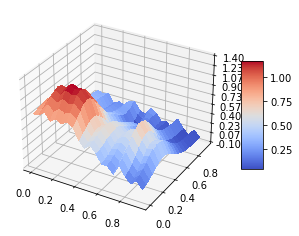

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = 0.05*np.random.randn(len(x))
    return term1 + term2 + term3 + term4 + noise


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Make design matrix with polynomial degree n

In [9]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of columns in beta
	X = np.ones((N,l)) # matrix with N rows, l columns

	for i in range(1,n+1): # 1-6
		q = int((i)*(i+1)/2) # 1 3 6 10 15 21
		for k in range(i+1): # 0-1, 0-2, 0-3,...
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X_array = np.zeros(5)
for i in range(5):
    n = i+1
    X_array[i] = create_X(x, y, n=n)
    

## Split train/test

In [12]:
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = X_train #scaler.fit_transform(X_train) # to not scale, just put = X_train instead of changing everywhere
X_test_scaled = X_test#scaler.transform(X_test)

## OLS regression

In [14]:
beta_ols = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train

ztilde_ols_train = X_train_scaled @ beta_ols
ztilde_ols_test = X_test_scaled @ beta_ols

print('R2 OLS train: %.10f' %(R2(z_train,ztilde_ols_train)))
print('R2 OLS test: %.10f' %(R2(z_test,ztilde_ols_test)))
print('mse OLS train: %.10f' %(MSE(z_train,ztilde_ols_train)))
print('mse OLS test: %.10f' %(MSE(z_test,ztilde_ols_test)))
print(beta_ols)

R2 OLS train: 0.9833087221
R2 OLS test: 0.9811560495
mse OLS train: 0.0029122112
mse OLS test: 0.0032887755
[ 7.67946503e-01 -1.45004299e+01  1.71028016e+01 -5.70136663e+02
  1.67775069e+03 -1.12675890e+03 -8.90413946e+02  2.29834489e+03
 -4.18072469e+03  2.81287232e+03 -3.58410313e+02  4.33538196e+03
 -1.44583698e+03 -5.55754057e+03  2.98895168e+03 -5.23038722e+03
  5.55734517e+03  3.87329715e+03 -2.12554105e+03 -4.84422055e+03
  2.78271455e+03]
